In [4]:
import pandas as pd

# load the titanic dataset
titanic_df  = pd.read_csv("/content/drive/MyDrive/workshop2/Titanic-Dataset.csv")

# subset the dataframe
subset_df = titanic_df[['Name', 'Pclass', 'Sex','Age', 'Fare', 'Survived']]
first_class_df = subset_df[subset_df['Pclass'] == 1]

# calculate statistics for the fare column
fare_mean = first_class_df['Fare'].mean()
fare_median = first_class_df['Fare'].median()
fare_max = first_class_df['Fare'].max()
fare_min = first_class_df['Fare'].min()

# print results
print (f"Mean Fare : {fare_mean}")
print (f"Median Fare : {fare_median}")
print (f"Max Fare : {fare_max}")
print (f"Min Fare : {fare_min}")


Mean Fare : 84.1546875
Median Fare : 60.287499999999994
Max Fare : 512.3292
Min Fare : 0.0


In [6]:
# check for null values in age column
age_null_count = first_class_df['Age'].isnull().sum()
print(f"number of null values in age : {age_null_count}")

# drop rows with null values in age
first_class_df_cleaned = first_class_df.dropna(subset=['Age'])
print(f"rows after dropping null age : {len(first_class_df_cleaned)}")

number of null values in age : 30
rows after dropping null age : 186


In [8]:
# one-hot encode the 'embarked' column
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')

# add the encoded columns to the original dataframe
titanic_encoded = pd.concat([titanic_df, embarked_dummies], axis=1)

# drop the original 'embarked' column
titanic_encoded.drop('Embarked', axis = 1, inplace = True)

# display the first few rows
print("Modified dataframe : ")
print(titanic_encoded.head())

Modified dataframe : 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False     

mean survival rates by gender : 
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<ipython-input-10-21ae1d9d7392>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_df, ci=None)


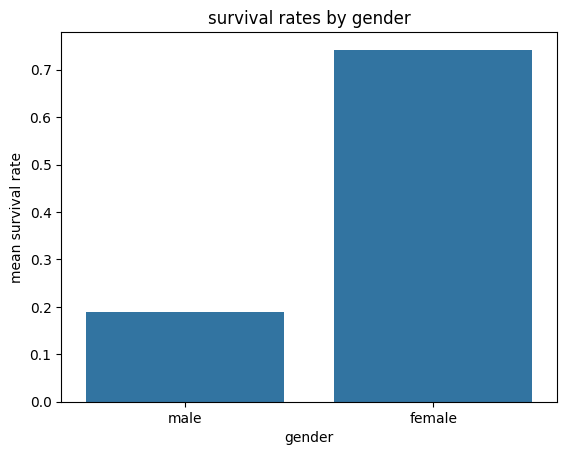

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# compare mean survival rates for each gender
gender_survival_rate = titanic_df.groupby('Sex')['Survived'].mean()
print("mean survival rates by gender : ")
print(gender_survival_rate)

# visualization
sns.barplot(x='Sex', y='Survived', data=titanic_df, ci=None)
plt.title("survival rates by gender")
plt.ylabel("mean survival rate")
plt.xlabel("gender")
plt.show()

mean survival rates by embarkation part: 
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


<ipython-input-12-7aa089363bec>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=titanic_df, ci=None)


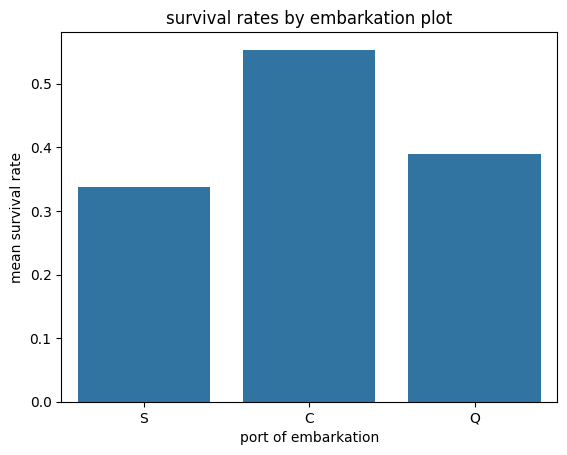

In [12]:
# compare survival rates by embarkation part
port_survival_rate = titanic_df.groupby('Embarked')['Survived'].mean()
print("mean survival rates by embarkation part: ")
print(port_survival_rate)

# visualization
sns.barplot(x='Embarked', y='Survived', data=titanic_df, ci=None)
plt.title("survival rates by embarkation plot")
plt.ylabel("mean survival rate")
plt.xlabel("port of embarkation")
plt.show()